# Predicción del Cultivo adecuado para varias suelos específicos
Objetivo del Ejercicio: Predecir el cultivo mas idóneo basandose en las condiciones especificas del terreno y el clima, maximizando asi el rendimiento y la sostenibilidad.

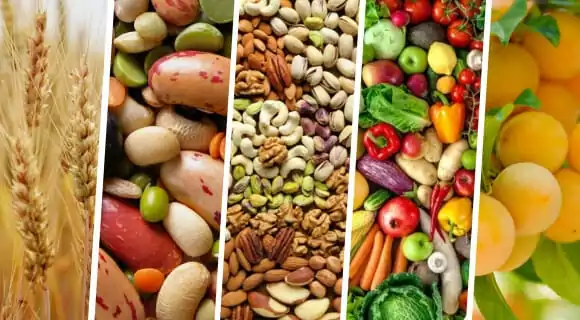

# 1. RECOLECCIÓN DE DATOS
1.1 Importar y Leer el DataSet

In [ ]:
# Librerias para manipulacion de Data y Gráficas
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

#Preparación de datos y configuración de pipeline para Machine Learning con scikit-learn
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import validation_curve
from sklearn.model_selection import cross_val_score
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder

#models
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
#for classification
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

#for regression
from sklearn.metrics import r2_score


In [ ]:
#Leer el DataSet
data = pd.read_csv('/content/Crop_recommendation.csv')

# 2. ANÁLISIS EXPLORATORIO DE DATOS (EDA)


# Comprendiendo los Datos

In [ ]:
#Entender y conocer el dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [ ]:
#Identificar si tenemos datos nulos

data = data.rename(columns={'N': 'Nitrogeno', 'P': 'Fosforo', 'K': 'Potasio', 'temperature': 'Temperatura', 'humidity': 'Humedad', 'ph': 'Ph del Suelo', 'rainfall': 'Lluvia', 'label': 'Cultivo'})
data.isnull().sum()

,0
Nitrogeno,0
Fosforo,0
Potasio,0
Temperatura,0
Humedad,0
Ph del Suelo,0
Lluvia,0
Cultivo,0


In [ ]:
# Mostrar las primeras filas del Dataframe para ir reconociendo la dataframe
data.head()
data.describe()

,Nitrogeno,Fosforo,Potasio,Temperatura,Humedad,Ph del Suelo,Lluvia
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


# Aplicar Encoding a las características categóricas

In [ ]:
#Con el fin de analizar la correlación entre las caracteristicas se realiza encode de la columna objetivo rain
label_encoders = {}
columns_to_encode = ['Cultivo']

for column in columns_to_encode:
    le = LabelEncoder()
    data[column + '_Númerico'] = le.fit_transform(data[column])
    label_encoders[column] = le
data.head(5)

,Nitrogeno,Fosforo,Potasio,Temperatura,Humedad,Ph del Suelo,Lluvia,Cultivo,Cultivo_Númerico
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,20
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,20
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,20
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,20
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,20


# Creamos la Matriz de Correlación

<Axes: >

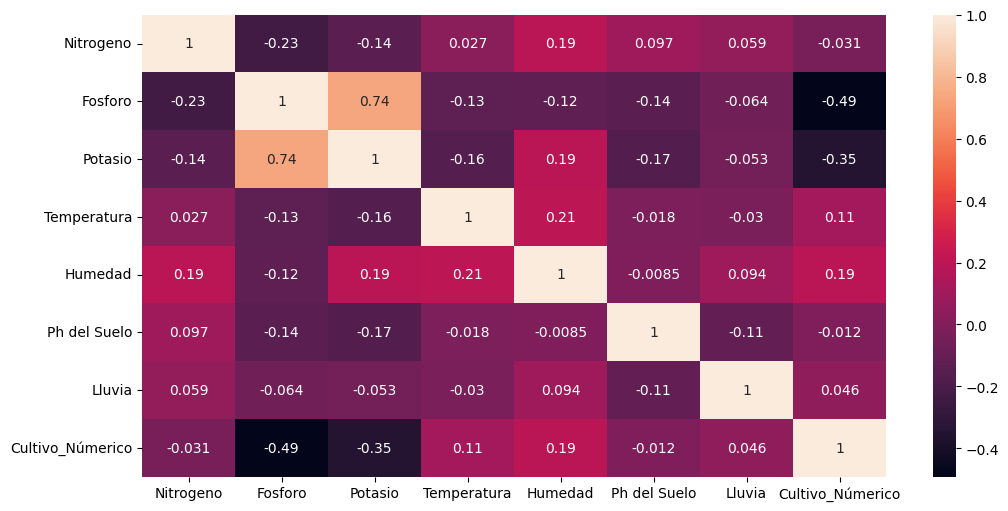

In [ ]:
# Analizar la correlación de las caracteristicas con respecto a la columna objetivo.
plt.figure(figsize=(12,6))
sns.heatmap(data.drop('Cultivo',axis=1).corr(),annot=True)

# Data Visualización

<ipython-input-38-e114da280212>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Cultivo', data=data, order=data['Cultivo'].value_counts().index, palette=colores)


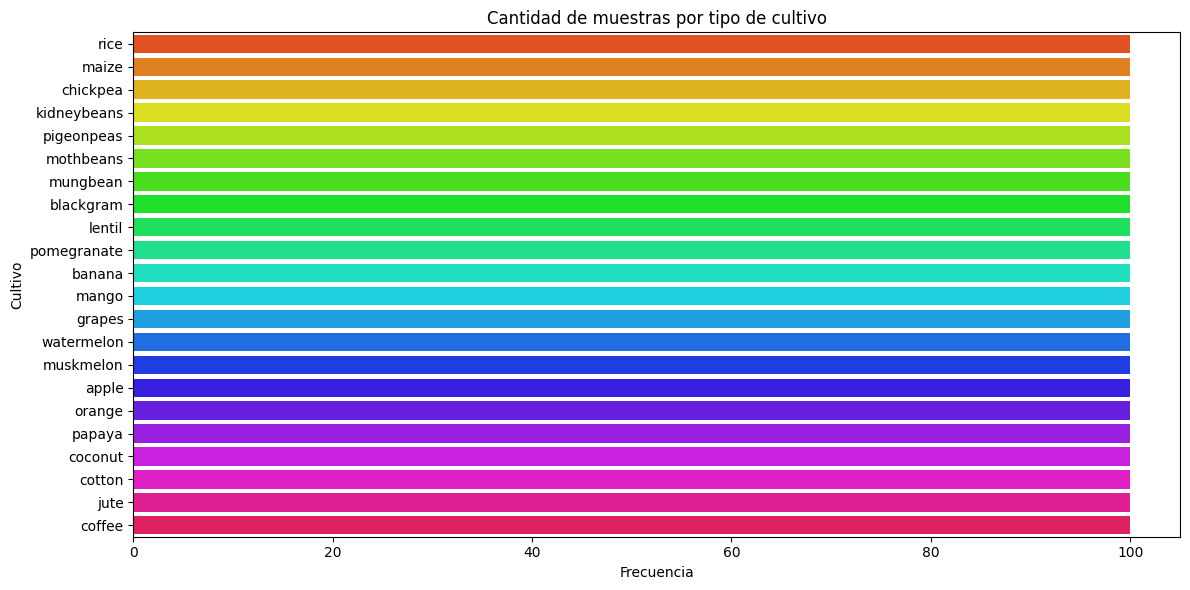

,Nitrogeno,Fosforo,Potasio,Temperatura,Humedad,Ph del Suelo,Lluvia,Cultivo_Númerico
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655,10.500000
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389,6.345731
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267,0.000000
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686,5.000000
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624,10.500000
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508,16.000000
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117,21.000000


In [ ]:
# Configurar el tamaño del gráfico
plt.figure(figsize=(12, 6))

codigo_a_cultivo = {
    0: 'apple',
    1: 'banana',
    2: 'blackgram',
    3: 'chickpea',
    4: 'coconut',
    5: 'coffee',
    6: 'cotton',
    7: 'grapes',
    8: 'jute',
    9: 'kidneybeans',
    10: 'lentil',
    11: 'maize',
    12: 'mango',
    13: 'mothbeans',
    14: 'mungbean',
    15: 'muskmelon',
    16: 'orange',
    17: 'papaya',
    18: 'pigeonpeas',
    19: 'pomegranate',
    20: 'rice',
    21: 'watermelon'
}
# Lista de cultivos (usando los valores del diccionario)
cultivos = list(codigo_a_cultivo.values())

# Crear una paleta de colores para los 22 cultivos
colores = sns.color_palette("hsv", len(cultivos))

# Generar el countplot
sns.countplot(y='Cultivo', data=data, order=data['Cultivo'].value_counts().index, palette=colores)

# Personalizar el gráfico
plt.title("Cantidad de muestras por tipo de cultivo")
plt.xlabel("Frecuencia")
plt.ylabel("Cultivo")
plt.tight_layout()

# Mostrar el gráfico
plt.show()
data.describe()

<ipython-input-41-92b93d4a0420>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cultivo', y=col, data=data, order=cultivos, palette=colores)


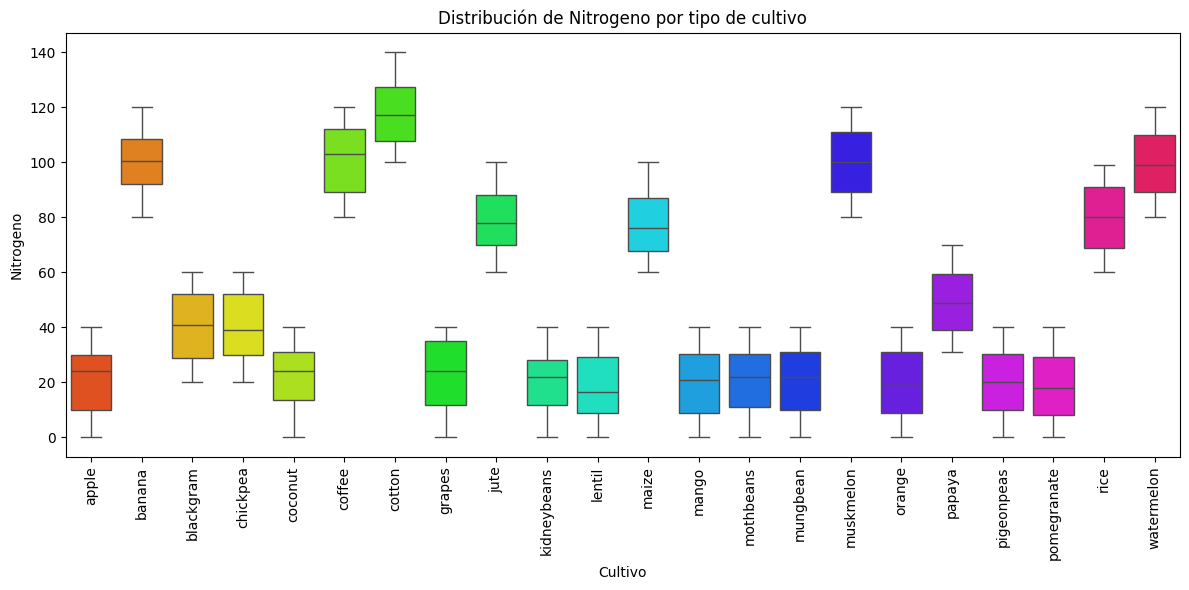

<ipython-input-41-92b93d4a0420>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cultivo', y=col, data=data, order=cultivos, palette=colores)


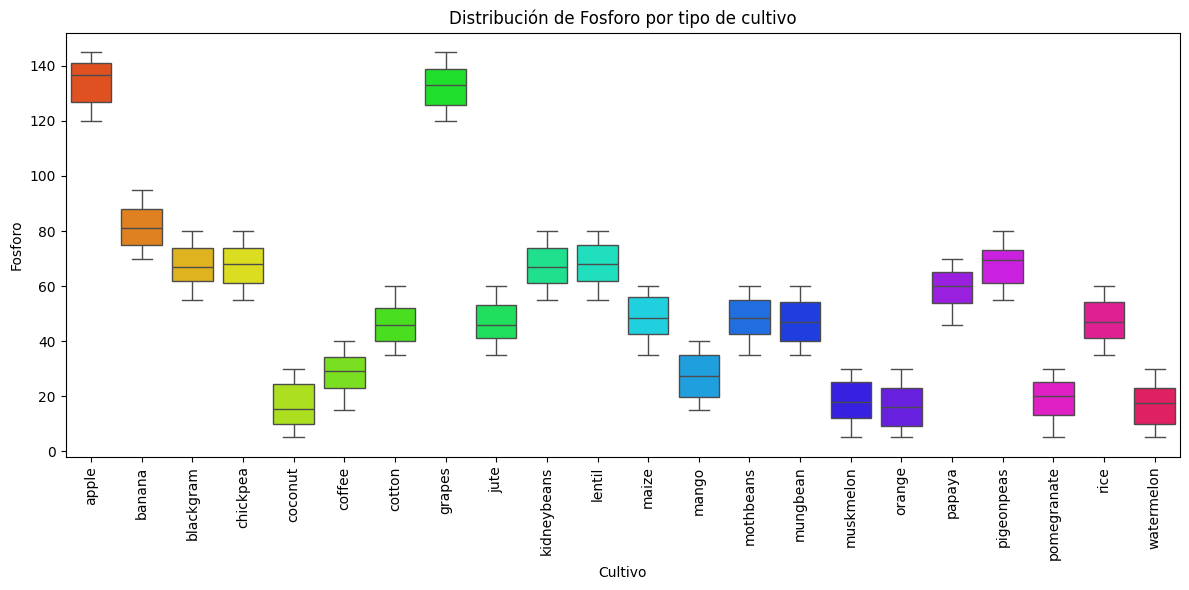

<ipython-input-41-92b93d4a0420>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cultivo', y=col, data=data, order=cultivos, palette=colores)


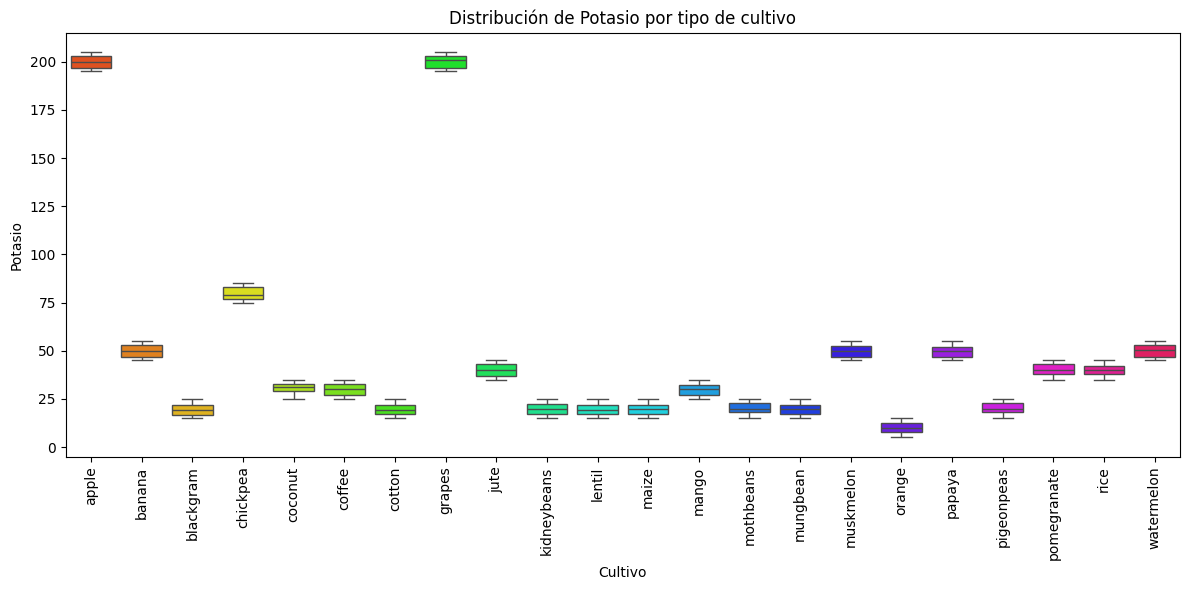

<ipython-input-41-92b93d4a0420>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cultivo', y=col, data=data, order=cultivos, palette=colores)


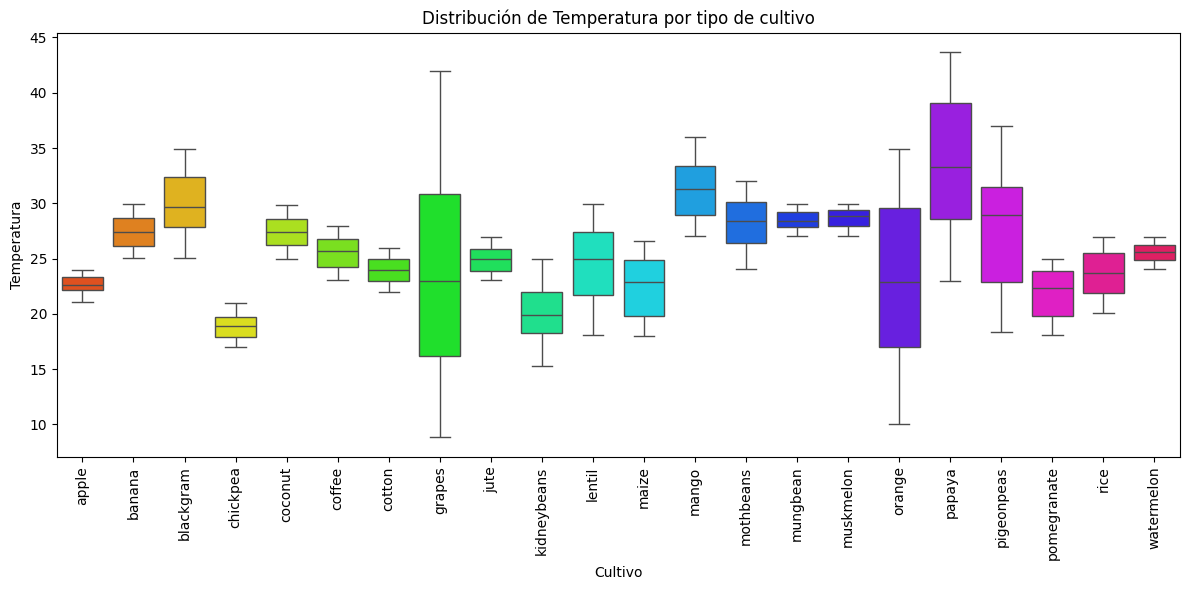

<ipython-input-41-92b93d4a0420>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cultivo', y=col, data=data, order=cultivos, palette=colores)


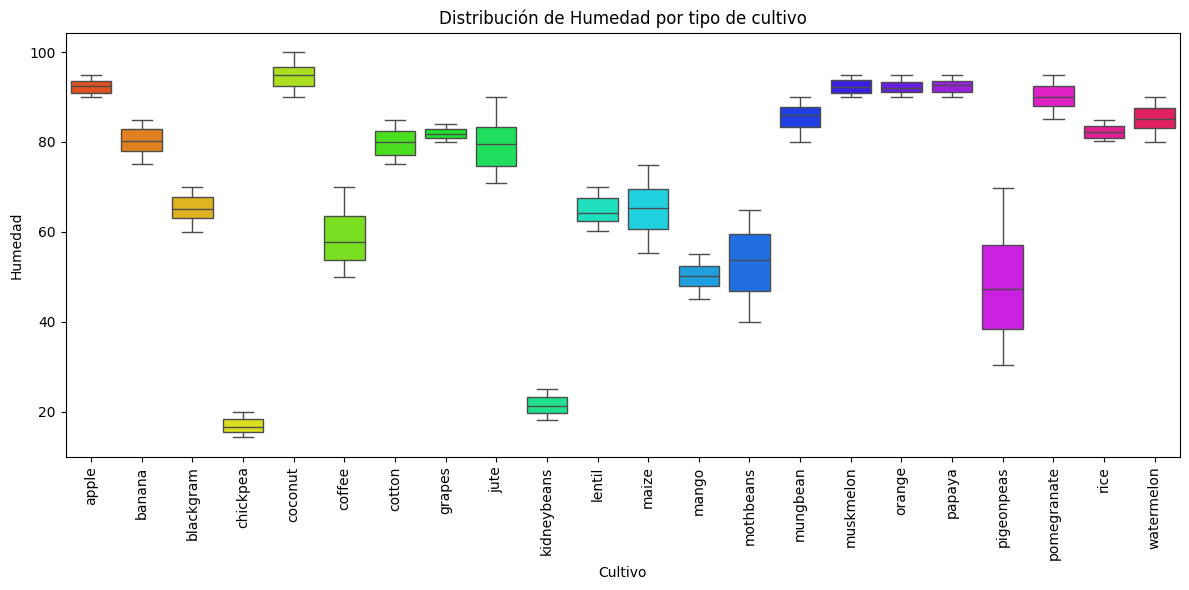

<ipython-input-41-92b93d4a0420>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cultivo', y=col, data=data, order=cultivos, palette=colores)


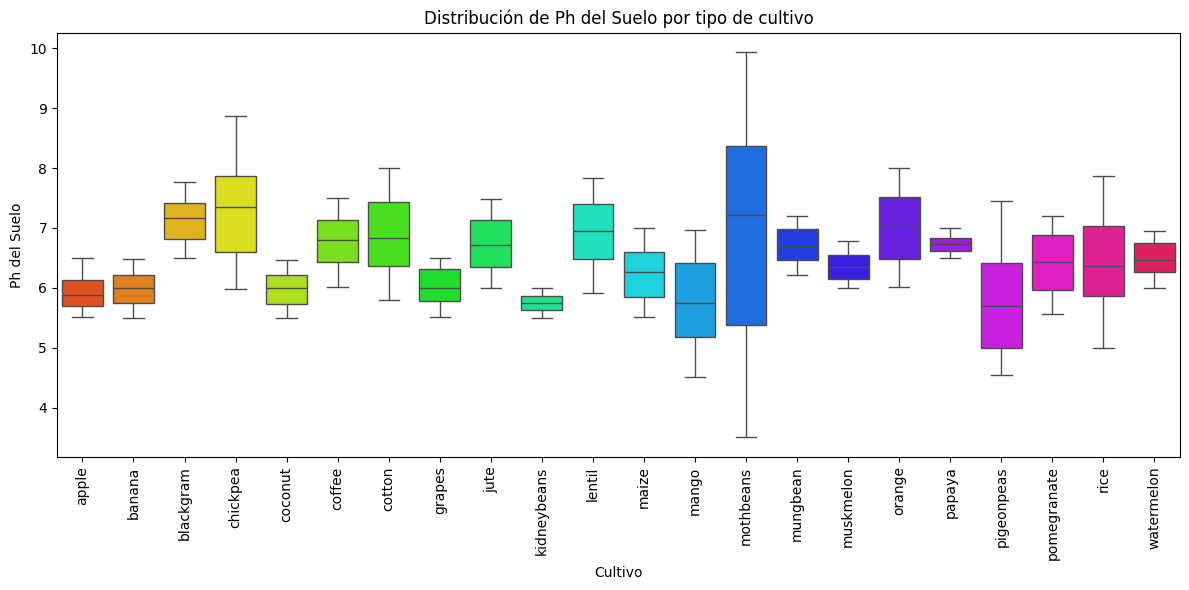

<ipython-input-41-92b93d4a0420>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cultivo', y=col, data=data, order=cultivos, palette=colores)


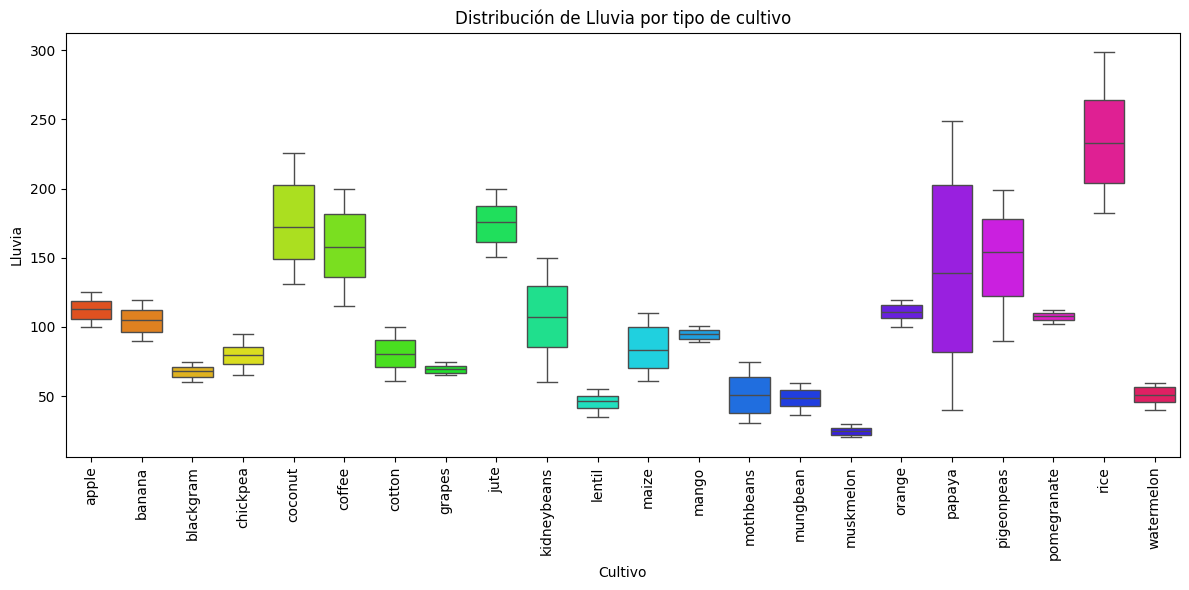

In [ ]:
# Lista de variables
variables = ['Nitrogeno', 'Fosforo', 'Potasio', 'Temperatura', 'Humedad', 'Ph del Suelo', 'Lluvia']

# Generar un boxplot para cada variable
for col in variables:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='Cultivo', y=col, data=data, order=cultivos, palette=colores)
    plt.xticks(rotation=90)
    plt.title(f"Distribución de {col} por tipo de cultivo")
    plt.tight_layout()
    plt.show()

# 3. PIPELINE/DIVISÓN DE DATOS

In [ ]:
#Selección de la caracteristica o función objetivo y el resto de los datos
X = data.drop(['Cultivo','Cultivo_Númerico'],axis=1)
y = data['Cultivo_Númerico']
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(1540, 7) (660, 7) (1540,) (660,)


# 4. PIPELINE/SELECCIÓN Y CONSTRUCCIÓN DEL MÓDELO

In [ ]:
'''Acá se está creando un modelo de regresión logística utilizando LogisticRegression de la biblioteca scikit-learn.
max_iter=1000: Estableces el número máximo de iteraciones para que el modelo pueda converger (es decir, encontrar los mejores coeficientes para los datos). Esto es útil si tienes un conjunto de datos complejo o grandes cantidades de datos.'''
model = LogisticRegression(max_iter=1000)


# 5. PIPELINE/ENTRENAR EL MÓDELO

In [ ]:
model.fit(X_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

# 6. PIPELINE/EVALUACIÓN DEL MÓDELO

In [ ]:
'''Utilizar el modelo entrenado (model) para predecir las etiquetas (Rain_encoded) para el conjunto de datos de prueba (X_test).
Genera un array (y_predict) que contiene las predicciones del modelo (0 o 1), basado en las características presentes en X_test.'''
y_predict = model.predict(X_test)

**Entendamos las Predicciones:**

In [ ]:
# Crear tabla comparativa
comparison_table = pd.DataFrame({
    'Valor Real (y_test)': y_test,
    'Predicción (y_predict)': y_predict
})

# Mostrar las primeras filas de la tabla comparativa
print("\nTabla comparativa:")
print(comparison_table)


Tabla comparativa:
      Valor Real (y_test)  Predicción (y_predict)
2041                    8                       8
144                    11                      11
925                    19                      19
183                    11                      11
1298                    7                       7
...                   ...                     ...
2117                    5                       5
653                    14                      14
195                    11                       6
626                    14                      14
531                    13                      13

[660 rows x 2 columns]


**Entendiendo mejor el resultado**

The accuracy of Logistic Regression is 0.9636


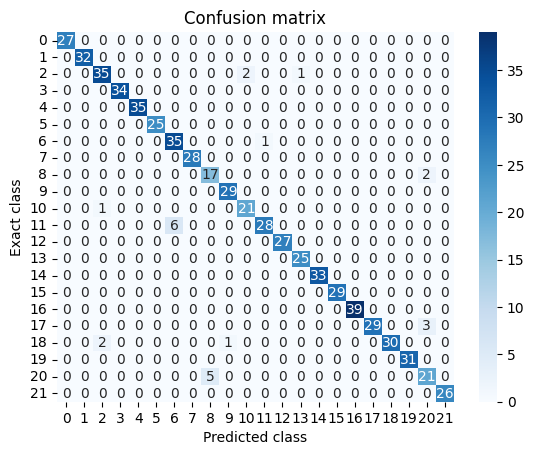

In [ ]:
accuracy = accuracy_score(y_test,y_predict)
print('The accuracy of Logistic Regression is {:.4f}'.format(accuracy))

confus_matrix = confusion_matrix(y_test,y_predict)
plt.title('Confusion matrix')
sns.heatmap(confus_matrix, annot=True, cmap='Blues', fmt='d')  # Formato entero
plt.xlabel('Predicted class')
plt.ylabel('Exact class');

serie = pd.Series(accuracy,index=['LogisticRegression'])
accuracy_Logmodel = pd.DataFrame({'accuracy':serie})

# KNeighbors Application - Aplicación de Clasificador de vecinos mas cercanos

**EXPERIMENTO 2**

In [ ]:
model = KNeighborsClassifier()
model.fit(X_train,y_train)

KNeighborsClassifier()

In [ ]:
y_predict = model.predict(X_test)

The accuracy of KNeighborsClassifier is 0.9773


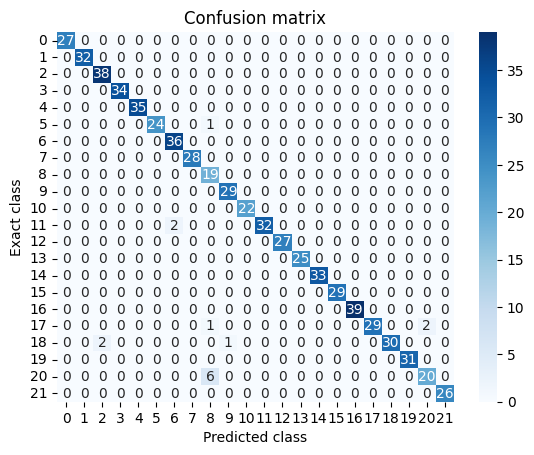

In [ ]:
accuracy = accuracy_score(y_test,y_predict)
print('The accuracy of KNeighborsClassifier is {:.4f}'.format(accuracy))

confus_matrix = confusion_matrix(y_test,y_predict)
plt.title('Confusion matrix')
sns.heatmap(confus_matrix, annot=True, cmap='Blues', fmt='d')  # Formato entero
plt.xlabel('Predicted class')
plt.ylabel('Exact class');

serie = pd.Series(accuracy,index=['KNeighborsClassifier'])
accuracy_KNmodel = pd.DataFrame({'accuracy':serie})

# Decision tree Application - Aplicación de Arboles de decisión

**EXPERIMENTO 3 - POR CADA EXPERIMENTO NUEVO REPETIR LOS PASOS QUE 3,4,5,6**

In [ ]:
model = DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_predict = model.predict(X_test)

The accuracy of Decision Tree is 0.9970


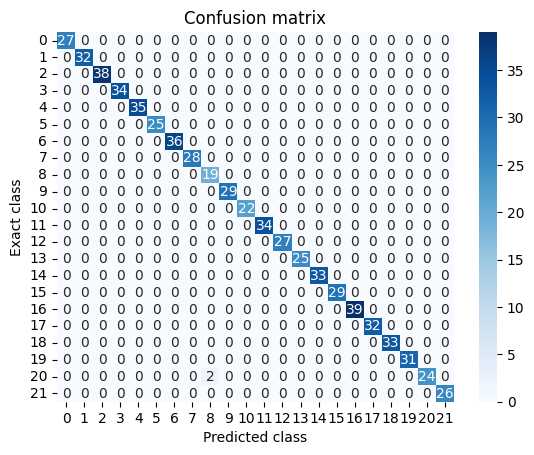

In [ ]:
accuracy = accuracy_score(y_test,y_predict)
print('The accuracy of Decision Tree is {:.4f}'.format(accuracy))

confus_matrix = confusion_matrix(y_test,y_predict)
plt.title('Confusion matrix')
sns.heatmap(confus_matrix, annot=True, cmap='Blues', fmt='d')  # Formato entero
plt.xlabel('Predicted class')
plt.ylabel('Exact class');

serie = pd.Series(accuracy,index=['DecisionTreeClassifier'])
accuracy_DTmodel = pd.DataFrame({'accuracy':serie})

# Random Forest Application - Aplicación de Bosques Aleatorios

**EXPERIMENTO 4 - POR CADA EXPERIMENTO NUEVO REPETIR LOS PASOS QUE 3,4,5,6**

In [ ]:
model = RandomForestClassifier(n_estimators=10)
model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10)

In [ ]:
y_predict = model.predict(X_test)

The accuracy of RandomForestClassifier is 0.9894


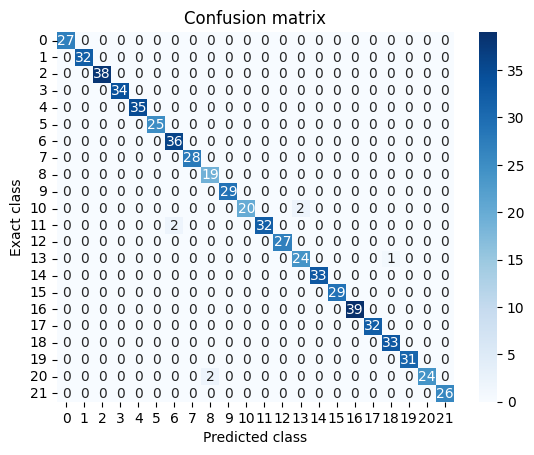

In [ ]:
accuracy = accuracy_score(y_test,y_predict)
print('The accuracy of RandomForestClassifier is {:.4f}'.format(accuracy))

confus_matrix = confusion_matrix(y_test,y_predict)
plt.title('Confusion matrix')
sns.heatmap(confus_matrix, annot=True, cmap='Blues', fmt='d')  # Formato entero
plt.xlabel('Predicted class')
plt.ylabel('Exact class');

serie = pd.Series(accuracy,index=['RandomForestClassifier'])
accuracy_RFmodel = pd.DataFrame({'accuracy':serie})

# Gaussian Naive Bayes Application - Aplicación de Gaussian Naive Bayes

In [ ]:
model = GaussianNB()
model.fit(X_train,y_train)

GaussianNB()

In [ ]:
y_predict = model.predict(X_test)

The accuracy of GaussianNB is 0.9955


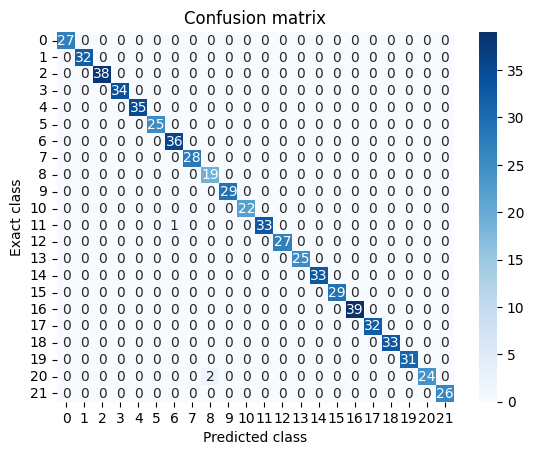

In [ ]:
accuracy = accuracy_score(y_test,y_predict)
print('The accuracy of GaussianNB is {:.4f}'.format(accuracy))

confus_matrix = confusion_matrix(y_test,y_predict)
plt.title('Confusion matrix')
sns.heatmap(confus_matrix, annot=True, cmap='Blues', fmt='d')  # Formato entero
plt.xlabel('Predicted class')
plt.ylabel('Exact class');

serie = pd.Series(accuracy,index=['GaussianNB'])
accuracy_NBmodel = pd.DataFrame({'accuracy':serie})

# Comparación del rendimiento de cada uno de los algoritmos utilizados

In [ ]:
accuracy_models = pd.concat([accuracy_Logmodel,accuracy_KNmodel,accuracy_DTmodel,accuracy_RFmodel,accuracy_NBmodel])
accuracy_models

,accuracy
LogisticRegression,0.963636
KNeighborsClassifier,0.977273
DecisionTreeClassifier,0.996970
RandomForestClassifier,0.989394
GaussianNB,0.995455


**Crear función para Automatizar la forma en que podemos enviarle una instancia individual y que nos devuelva la predicción.**

In [ ]:
def predecir_cultivo(n, p, k, temperatura, humedad, ph, lluvia):
    """
    Predice el cultivo ideal según condiciones ingresadas.
    """
    datos = [[n, p, k, temperatura, humedad, ph, lluvia]]
    cultivo_predicho = model.predict(datos)
    return cultivo_predicho[0]

In [ ]:
# Ingreso de condiciones
cultivo = predecir_cultivo(
    n=90,
    p=42,
    k=43,
    temperatura=24.0,
    humedad=80.0,
    ph=6.5,
    lluvia=220.0
)

print(f"🌱 Cultivo recomendado: {cultivo}")

🌱 Cultivo recomendado: 20


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


In [ ]:
def predecir_cultivo_codificado(n, p, k, temperatura, humedad, ph, lluvia, modelo, codificador):
    datos = [[n, p, k, temperatura, humedad, ph, lluvia]]
    resultado = modelo.predict(datos)
    cultivo = codificador.inverse_transform(resultado)[0]
    return cultivo

In [ ]:
cultivo = predecir_cultivo_codificado(
    n=90, p=42, k=43, temperatura=24.0, humedad=80.0, ph=6.5, lluvia=220.0,
    modelo=model,
    codificador=le
)

print("Cultivo recomendado:", cultivo)


Cultivo recomendado: rice


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


In [ ]:
# Al final de tu script, después de entrenar el modelo
from joblib import dump

# Guardar el modelo entrenado
dump(model, 'modelo_Clasificación de cultivos.joblib')
print("Modelo guardado como 'modelo_Clasificación de cultivos.joblib'")


Modelo guardado como 'modelo_Clasificación de cultivos.joblib'
